In [1]:
import pandas as pd
import random
import numpy as np
import BTree as bt
import time
import sys
import string
import BRetrieval as bre


In [2]:
dataset_location = 'dataset/news_summary.csv'
data = pd.read_csv(dataset_location, encoding='latin') 
input_column = 'text'
brs = bre.BRetrievalSystem(data, input_column,500)

Preprocessing text...
Building Positional Inverted Index...
Building BTree...
4889 nodes in the tree


In [3]:
# I try to find articles about police cases, I'll just search the word 'kill' to assess the relevance of the documents
query = 'kill'

# This is a list of documents I consider relevant for police cases
relevant_documents = ['114', '128', '144', '145' '149', '151', '155', '158', '159', '175', '196', '200', 
                                         '203', '204', '209', '214', '217', '222', '231', '251', '24', '27', '275', '277', 
                                         '281','282', '290', '296','30', '303', '307', '316', '329', '333', '3', '30' '34', 
                                          '31', '356', '375', '39', '392', '398', '4', '400', '401', '402', '403', 
                                         '406', '412', '441', '442', '443', '449', '457', '476', '477', '480', 
                                         '49', '499', '5', '62', '79', '80', '81', '91', '93']

brs.print_result(query)
#result = ['145', '159', '169', '180', '194', '203', '209', '210', '214', '232', '24', '251', 
#          '281', '296', '3', '30', '31', '315', '354', '475', '93', '98']



Documents matching the query:
['145', '159', '169', '180', '194', '203', '209', '210', '214', '232', '24', '251', '281', '296', '3', '30', '31', '315', '354', '475', '93', '98']
(145, "The Supreme Court on Tuesday agreed to hear a plea seeking cancellation of Bihar CM Nitish Kumar's state Legislative Council membership for allegedly hiding a pending criminal case against him. According to the plea, Kumar was accused of killing a Congress leader in 1991. The petitioner also sought a direction to the CBI to register an FIR against Kumar.")
(159, "Lashkar-e-Taiba's Kashmir Chief Abu Dujana has been killed in an encounter with security forces in Pulwama district of Jammu and Kashmir. His accomplice has also been terminated by the forces. He is the third top militant leader killed since last year following Hizbul Mujahideen leaders Burhan Wani and Sabzar Bhat.")
(169, 'Congress leader Mallikarjun Kharge on Monday said, "Don\'t make lynchistan out of Hindustan" and blamed the BJP-led NDA gov

In [4]:
# '145' Relevant
# '159' Relevant
# '169' Not Relevant
# '180' Not Relevant
# '194' Not Relevant
# '203' Relevant
# '209' Relevant
# '210' Not Relevant
# '214' Relevant
# '232' Not Relevant
# '24'  Relevant
# '251' Relevant
# '281' Relevant
# '296' Relevant
# '3'   Relevant
# '30'  Relevant
# '31'  Relevant
# '315' Not Relevant
# '354' Not Relevant
# '475' Not Relevant
# '93'  Relevant
# '98'  Not Relevant

# Relevant = 1,  Not Relevant = 0


# I already checked the result
results = [1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0]

# Compute precision and recall values
precision = []
recall = []

for i in range(0, len(results)):
    precision.append(sum(results[0:i+1])/(i+1))
    recall.append(sum(results[0:i+1])/len(relevant_documents))

#print(precision)
#print(recall)

(0.0, 1.0)

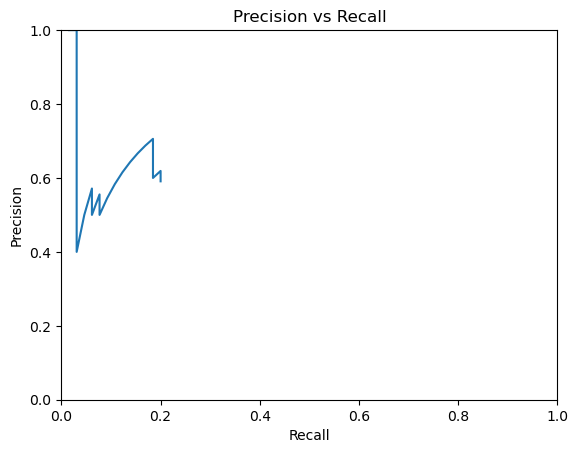

In [12]:
import matplotlib.pyplot as plt
plt.plot(recall, precision, label='p vs r')
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
